<a href="https://colab.research.google.com/github/sahikacelenk/AISummerCamp_FinalProjects/blob/main/Proje1_MedikalMaliyetAnalizi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Medikal Maliyet Analizi**

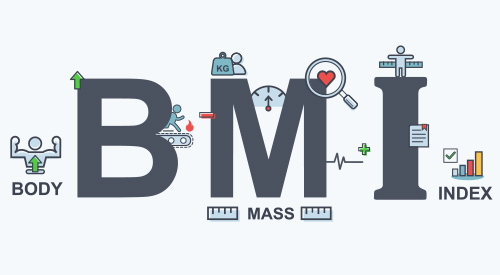

Bu çalışmada, https://www.kaggle.com/datasets/mirichoi0218/insurance kaynağındaki data seti incelenerek, öncelikle datanın genel analizi yapılarak değişkenler arası ilişki incelenmiştir. Sonrasında da birkaç regresyon modeli denemesi yapılarak, en iyi yüzdeye sahip olan model kabul edilmiştir. Bu çalışmanın amacı, verilen değişkenlere göre bir kişinin sağlık sigortasının yaklaşık ne kadar masraflı olacağını tahmin etmektir.



*   Çalışma aşamaları comment kısımlarında belirtilmiştir.
*   Grafiklerden çıkarılan yorumlar, grafik sonrasında ya da python kodu sonrasında belirtilmiştir. Bu nedenle ayrı bir döküman hazırlanmamıştır.



In [1]:
#Gerekli kütüphanelerin eklenmesi
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import sklearn as sk

**Keşifsel Veri Analizi**

Bu kısımda, data seti değişkenleri arasındaki ilişki, yapılan görselleştirmeler yardımıyla incelenmiştir.

In [3]:
#.csv dosyasının colab ortamına alınması
data_orj=pd.read_csv('insurance.csv')
df= data_orj.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Veri seti incelendiğinde, eksik bilgi içeren bir sütuna rastlanmamıştır.

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Veri setinin mean, standart deviation gibi temel istatistik bilgilerine baktığımızda, yaş ortalamasının 39 olduğunu, median ve mean değerlerinin birbirine yakın çıkması sonucunda da 
datanın çok fazla aykırı değer içermediğini söyleyebiliriz.

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


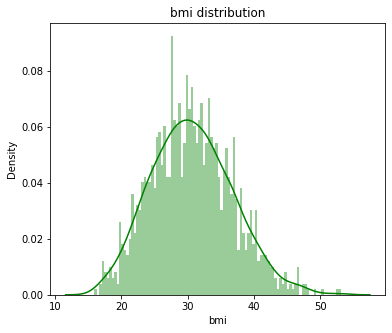

In [5]:
#Bmi(Vücut Kitle İndeksi)’nin dağılımını inceleyiniz
print(df['bmi'].describe())
plt.figure(figsize=(6, 5))
sns.distplot(df['bmi'], color='g', bins=100).set(title='bmi distribution');

Bmi metriği genel anlamıyla, kişinin kg cinsinden ağırlığının, metre cinsinden uzunluğunun karesine bölünmesiyle elde edilen vücut kitle indeksidir. Veri setindeki bmi değerlerini dağılım grafiği üzerinde incelediğimizde, verinin normal dağılım gösterdiğini söyleyebiliriz. Mean ve median değerlerinin de birbirine yakın olması, verinin normal dağılım gösterdiğini desteklemektedir.

In [6]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

df['smoker'] = label_encoder.fit_transform(df['smoker']) 
df['region']=label_encoder.fit_transform(df['region'])
df['sex']=label_encoder.fit_transform(df['sex'])

Veri setindeki kategorik sütunlar, label encoder ile sayısal ifadelere dönüştürülerek, diğer sayısal verilerle aralarındaki ilişkinin incelenebilmesi amaçlanmıştır.

In [7]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


Oluşturulan korelasyon matrisi ve korelasyon heatmap görseli ile veri setinde birbiri ile yüksek ya da düşük korelasyonlu sütunlar kolaylıkla gözlemlenmektedir. Genel olarak bakıldığında en dikkat çeken durum olarak, “smoker” ve “charges” verileri arasında yüksek korelasyonun görülmesidir.

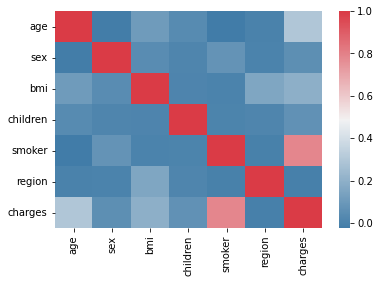

In [8]:
sns.heatmap(df.corr(),cmap=sns.diverging_palette(240,10,as_cmap=True));

Korelasyon katsayısı (r) nın yorumu;

r<0.2 ise çok zayıf ilişki yada korelasyon yok

0.2-0.4 arasında ise zayıf korelasyon

0.4-0.6 arasında ise orta şiddette korelasyon

0.6-0.8 arasında ise yüksek korelasyon

0.8> ise çok yüksek korelasyon olduğu yorumu yapılır.

In [9]:
df.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

Charges ile smoker arasında yüksek bir korelasyon olduğu görülmektedir (yaklaşık 0.78).

In [10]:
# “smoker” ile “charges” arasındaki ilişkiyi inceleyiniz
df['charges'].groupby(df['smoker']).mean()

smoker
0     8434.268298
1    32050.231832
Name: charges, dtype: float64

“smoker” ve “charges” verileri arasında, yüksek bir korelasyon görülmektedir (0.78). Sigara içenlerin ve içmeyenlerin yaptıkları ödeme miktarları, oluşturulan barplot üzerinde gösterilmiştir. “1” olarak belirtilen sigara içen kişilerin, içmeyenlere göre neredeyse 4 kat daha fazla ödeme yaptıkları görülmektedir.

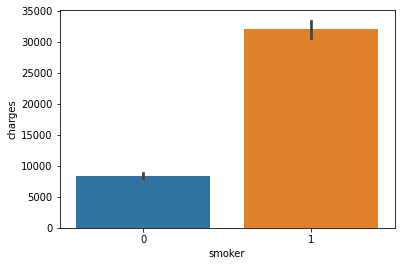

In [11]:
sns.barplot(x="smoker",y="charges",data=df);

In [12]:
df[['smoker', 'charges']].corr()

,smoker,charges
smoker,1.000000,0.787251
charges,0.787251,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


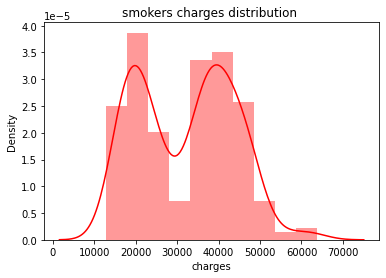

In [13]:
sns.distplot(data_orj[(data_orj["smoker"] == "yes")]["charges"],color='r', bins=10).set(title='smokers charges distribution ');

Sigara içenlerin ücretlendirme dağılımına bakıldığında, bimodal (çok modlu) dağılım gösterdiği ve iki tepe noktası olduğu görülmektedir. 
Bu durum şu şekilde yorumlanabilir: sigara içenler arasında diğer tutarlara göre, 20000 civarı ve 40000 civarı ücretlendirmeye tabi 
tutulanların yoğunlukta olduğu iki farklı grup var denilebilir.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


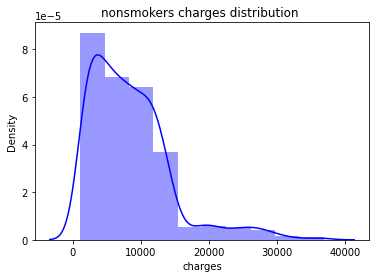

In [14]:
sns.distplot(data_orj[(data_orj["smoker"] == "no")]["charges"],color='b', bins=10).set(title='nonsmokers charges distribution ');

Sigara içmeyenlerin ücretlendirme dağılım grafiğinde ise, ücretlendirmenin ağırlıklı olarak 0-15000 arasında yoğunlaştığı gözlemlenebilir.

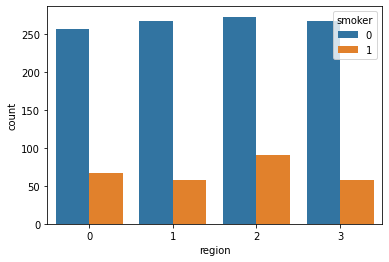

In [15]:
# “smoker” (Sigara tüketen) ile “region”(Bölge) arasındaki ilişkiyi inceleyiniz.
sns.countplot(x="region", hue="smoker", data=df);

Sigara tüketen / tüketmeyen kişiler ve bölgeler arasındaki ilişkiye bakıldığında, bölge bazında dağılım grafiğini inceleyebiliriz. 
Her bölgede sigara içmeyenlerin sayısı, içenlere göre daha fazladır. Sigara içenler bölgelere göre incelendiğinde ise, bölge 2’nin 
diğer bölgelere göre daha fazla smoker oranına sahip olduğu söylenebilir.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


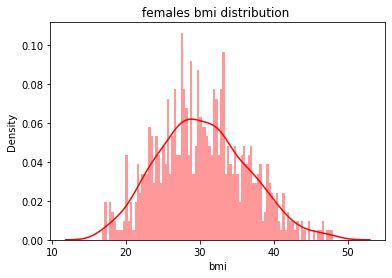

In [16]:
# “bmi” ile “sex”(Cinsiyet) arasındaki ilişkiyi inceleyiniz.
sns.distplot(data_orj[(data_orj["sex"] == "female")]["bmi"],color='r', bins=100).set(title='females bmi distribution ');

Bmi verisi ile cinsiyet arasındaki ilişki için male ve female olarak iki ayrı grafik üzerinde inceleme yapılmıştır. 
Her iki grupta da normal dağılım görülmektedir. Kadınların bmi verisi ile ilişkisi incelendiğinde, yaklaşık olarak 28-29 
değerlerinde bir yoğunlaşma görülürken, erkeklerin grafiğinde ise 31-32 değerlerinde bir yoğunlaşma görülmektedir.
Buna göre, erkeklerin bmi ortalamasının, kadınların bmi ortalamasından daha fazla olduğu yorumu yapılabilir. 
Ancak buradan bir genelleme çıkarmak anlamsız olacaktır. Bmi değeri, kişinin boy ve kilo değerleriyle ilgili olup, 
cinsiyete göre genelleme yapılmaması gerekir. Bahsedilen yorumlar, bmi veri seti özelinde yapılan çıkarımlardır.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


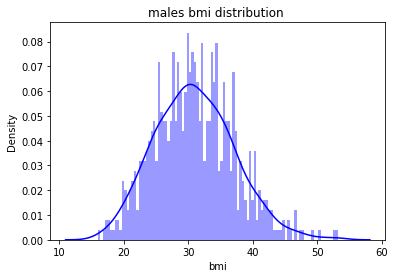

In [17]:
sns.distplot(data_orj[(data_orj["sex"] == "male")]["bmi"],color='b', bins=100).set(title='males bmi distribution ');

In [18]:
# En çok “children”’a sahip “region”’ı bulunuz.
max_child_id=data_orj[['children']].idxmax()
data_orj['region'].iloc[max_child_id]

32    southwest
Name: region, dtype: object

En çok çocuk popülasyonu, southwest bölgesinde bulunmaktadır.

In [19]:
# “Age” ile “bmi” arasındaki ilişkiyi inceleyiniz.
df['age'].corr(df['bmi'])

0.1092718815485352

Yaş ve bmi verileri arasındaki korelasyona bakıldığında, korelasyon katsayısı yaklaşık olarak 0.1 ‘dir. 
Bu da iki veri arasında çok zayıf bir ilişki olduğu anlamına gelmektedir.

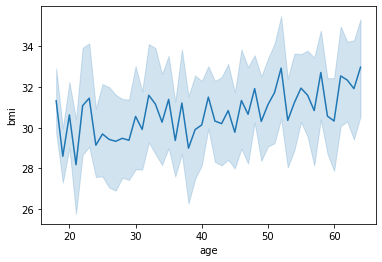

In [20]:
sns.lineplot(x="age", y="bmi", data=df);

Line plot çizilerek de bmi ve yaş arasındaki ilişki görselleştirilmiştir. Grafiğe göre yaş arttıkça bmi de artıyor gibi 
gözükse de, yaş aralıklarındaki dalgalanmalar, iki verinin birbiri ile ilişkili olmadığı sonucunu da çıkarmaktadır.

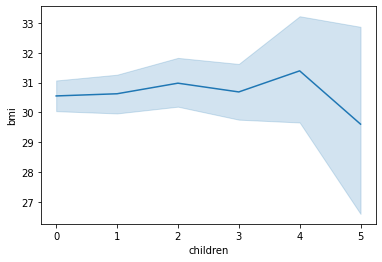

In [21]:
# “bmi” ile “children” arasındaki ilişkiyi inceleyiniz
sns.lineplot(x = "children", y = "bmi", data=df);

Bmi ve çocuk sayısı arasındaki ilişki lineplot çizilerek görselleştirilmiştir. İlk aşamalarda oluşturulan korelasyon matrisinde de görülebileceği üzere, bu iki veri arasında korelasyon olmadığı görülmektedir (korelasyon katsayısı 0.01).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


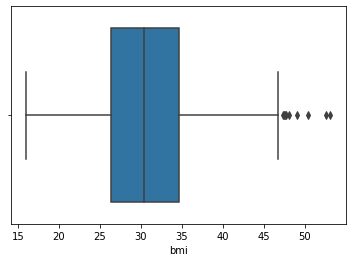

In [22]:
# “bmi” değişkeninde outlier var mıdır? İnceleyiniz.
sns.boxplot(df['bmi']);

Boxplot üzerinde görüldüğü üzere, bmi değerlerinde yaklaşık olarak 46-47’den sonrası outlier olarak tanımlanabilir.

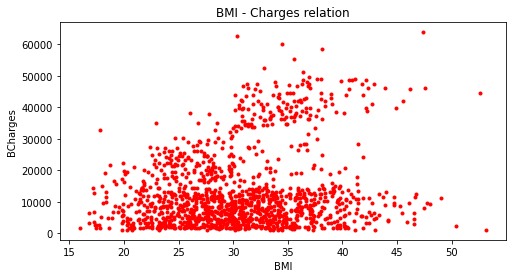

In [23]:
# “bmi” ile “charges” arasındaki ilişkiyi inceleyiniz.
plt.figure(figsize=(8, 4))

plt.xlabel('BMI')
plt.ylabel('BCharges')
plt.title("BMI - Charges relation")
plt.scatter(df['bmi'],df['charges'], marker=".", color='red')
plt.show()

Bmi ile charges arasındaki korelasyon katsayısı yaklaşık olarak 0.2’dir (öncesinde oluşturulan korelasyon matrisinde görülmektedir). 
Yani aralarında zayıf bir korelasyon vardır. Çizilen scatterplot grafiğinde de verilerin anlamsız bir şekilde dağıldığını söyleyebiliriz.

In [24]:
df['bmi'].corr(df['charges'])

0.19834096883362895

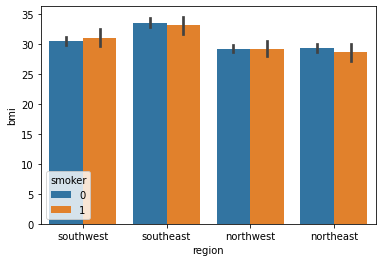

In [25]:
# “region”, “smoker” ve “bmi” arasındaki ilişkiyi bar plot kullanarak inceleyiniz.
sns.barplot(x = data_orj["region"], y = "bmi", hue = "smoker", data=df);

Bölge bazında smoker ve bmi verileri arasındaki ilişki incelendiğinde, southeast bölgesinde hem sigara içen hem de 
içmeyen kişilerin bmi değerlerinin diğer bölgelere oranla yüksek olduğu görülmektedir. Northwest ve northeast bölgeleri 
ise hemen hemen aynı bmi değerlerindedir. Grafik geneline bakıldığında, sigara içip içmeme durumunun bmi üzerinde çok fazla 
etkisinin olmadığı söylenebilir. Ayrıca bölgelerin de bmi değerine doğrudan bir katkısı bulunmamaktadır. Sadece bölge 
bazında ortalama bmi değeri farklılaşmaktadır.

In [26]:
df.corr()['charges'].sort_values(ascending=False)

charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
region     -0.006208
Name: charges, dtype: float64

Model aşamasında, anlamlı verileri değerlendirebilmek adına, charges ile korelasyonu 0.2 değerinden düşük olan değişkenleri almadan regresyon modelleri oluşturulmasına karar verilmiştir.

In [27]:
# Model için seçilen sütunların alınarak yeni bir dataframe oluşturulması
df_new=df[['age','smoker','bmi','charges']]
df_new

,age,smoker,bmi,charges
0,19,1,27.900,16884.92400
1,18,0,33.770,1725.55230
2,28,0,33.000,4449.46200
3,33,0,22.705,21984.47061
4,32,0,28.880,3866.85520
...,...,...,...,...
1333,50,0,30.970,10600.54830
1334,18,0,31.920,2205.98080
1335,18,0,36.850,1629.83350
1336,21,0,25.800,2007.94500


Verilerin Normalize Edilmesi

In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df_new)

normalized_df_new = pd.DataFrame(normalized_data, columns=df_new.columns)

print(normalized_df_new)

           age  smoker       bmi   charges
0     0.021739     1.0  0.321227  0.251611
1     0.000000     0.0  0.479150  0.009636
2     0.217391     0.0  0.458434  0.053115
3     0.326087     0.0  0.181464  0.333010
4     0.304348     0.0  0.347592  0.043816
...        ...     ...       ...       ...
1333  0.695652     0.0  0.403820  0.151299
1334  0.000000     0.0  0.429379  0.017305
1335  0.000000     0.0  0.562012  0.008108
1336  0.065217     0.0  0.264730  0.014144
1337  0.934783     1.0  0.352704  0.447249

[1338 rows x 4 columns]


In [29]:
#Verinin %70 eğitim, % 30 test datası olacak şekilde bölünmesi
from sklearn.model_selection import train_test_split
train, test = train_test_split(normalized_df_new, test_size=0.3,random_state = 17) 

In [30]:
# label 'charges' olacak şekilde verinin ayrıştırılması
X_train = train.drop("charges",axis=1)
y_train = train.loc[:,"charges"]

X_test = test.drop("charges",axis=1)
y_test = test.loc[:,"charges"]

In [31]:
# Model için gerekli kütüphanelerin indirilmesi
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures

Model Seçimi ve Denemeler

Linear Regression

---



In [32]:
linear_reg = LinearRegression()
linear_reg.fit(X_train,y_train)
linear_reg_pred = linear_reg.predict(X_test)
scores=cross_val_score(linear_reg,X_test,y_test,cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.70 accuracy with a standard deviation of 0.13


Polynomial Regression

---



In [33]:
poly_reg = PolynomialFeatures(degree=3)
# Belirlenen dereceye göre bağımsız değişkenlerin hazırlanması
poly_train = poly_reg.fit_transform(X_train)
poly_test =poly_reg.fit_transform(X_test)

L_regression = LinearRegression()

model = L_regression.fit(poly_train, y_train)

scores=cross_val_score(model,poly_test,y_test,cv=10)
print("%0.2f doğruluk (accuracy) ve standart sapması  %0.2f" % (scores.mean(), scores.std()))

0.82 doğruluk (accuracy) ve standart sapması  0.11


Support Vector Regression

---



In [34]:
svr_regressor = SVR(kernel = 'rbf')
svr_regressor.fit(X_train, y_train)
scores=cross_val_score(svr_regressor , X_test, y_test, cv=10)
print("%0.2f doğruluk (accuracy) ve standart sapması  %0.2f" % (scores.mean(), scores.std()))

0.67 doğruluk (accuracy) ve standart sapması  0.13


Decision Tree Regression

---



In [35]:
dec_tree_reg=DecisionTreeRegressor(max_depth=3)
dec_tree_reg.fit(X_train,y_train)
scores=cross_val_score(dec_tree_reg, X_test, y_test, cv=10)
print("%0.2f doğruluk (accuracy) ve standart sapması %0.2f" % (scores.mean(), scores.std()))

0.84 doğruluk (accuracy) ve standart sapması 0.10


Random Forest Regressor

---



In [36]:
rr_regressor = RandomForestRegressor(n_estimators = 10)
rr_regressor.fit(X_train, y_train)
scores=cross_val_score(rr_regressor , X_test, y_test, cv=10)
print("%0.2f doğruluk (accuracy) ve standart sapması %0.2f" % (scores.mean(), scores.std()))

0.77 doğruluk (accuracy) ve standart sapması 0.13


Gradient Boosting Regressor

---



In [37]:
from sklearn.ensemble import GradientBoostingRegressor

gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(X_train, y_train)
scores=cross_val_score(gb_regressor , X_test, y_test, cv=10)
print("%0.2f doğruluk (accuracy) ve standart sapması %0.2f" % (scores.mean(), scores.std()))

0.81 doğruluk (accuracy) ve standart sapması 0.10


Yapılan model denemeleri sonucunda, Decision Tree Regressor modelinin, 0.84 doğruluk (accuracy) ve standart sapması 0.10 ile en iyi sonucu verdiği görülmektedir.

HİPER-PARAMETRE OPTİMİZASYONU

In [38]:
# max_depth'in  Decision-Tree Regresyona etkisi
max_depth = 0
for i in range(1,5):
    dec_tree_reg=DecisionTreeRegressor(max_depth=i)
    dec_tree_reg.fit(X_train,y_train)
    scores=cross_val_score(dec_tree_reg, X_test, y_test, cv=10)
    print(" max_depth = %d, %0.2f doğruluk (accuracy) ve standart sapması  %0.2f" % (max_depth,scores.mean(), scores.std()))

 max_depth = 0, 0.52 doğruluk (accuracy) ve standart sapması  0.14
 max_depth = 0, 0.80 doğruluk (accuracy) ve standart sapması  0.08
 max_depth = 0, 0.84 doğruluk (accuracy) ve standart sapması  0.10
 max_depth = 0, 0.82 doğruluk (accuracy) ve standart sapması  0.09


GRIDSEARCH İLE OPTİMİZASYON

In [39]:
reg=DecisionTreeRegressor()
params=reg.get_params().keys()
params

dict_keys(['ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [42]:
from sklearn.model_selection import GridSearchCV
dtm = DecisionTreeRegressor(max_depth=4,
                           min_samples_split=5,
                           max_leaf_nodes=10)

dtm.fit(X_train,y_train)
param_grid = {"criterion": ["absolute_error"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }

grid_cv_dtm = GridSearchCV(dtm, param_grid, cv=10)

grid_cv_dtm.fit(X_train,y_train)

print(grid_cv_dtm.best_params_)

bestDTR = grid_cv_dtm.best_estimator_
print('Test accuracy: %.3f' % bestDTR.score(X_test, y_test))

{'criterion': 'absolute_error', 'max_depth': 6, 'max_leaf_nodes': 20, 'min_samples_leaf': 20, 'min_samples_split': 10}
Test accuracy: 0.862


MODELİN DEĞERLENDİRilMESİ

In [43]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

dec_tree_reg=DecisionTreeRegressor(max_depth=6, max_leaf_nodes= 20,min_samples_leaf=20,min_samples_split=10)
dec_tree_reg.fit(X_train,y_train)
y_pred=dec_tree_reg.predict(X_test)

mse=mean_squared_error(y_test,y_pred)
print(" Mean Squared Error:" ,mse)

mae=mean_absolute_error(y_test,y_pred)
print(" Mean absolute Error:" ,mae)

 Mean Squared Error: 0.004335161854851344
 Mean absolute Error: 0.04028884791633664
